# 01_1.EDA(범주형 자료 분석)

## 1.package 설치

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 세션 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

In [2]:
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
url = "https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/01_1.EDA.csv"
eda_df = pd.read_csv(url, encoding="cp949")
eda_df.head(10)

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,1,1,40,100,87,80
1,2,여자,2,2,50,100,83,60
2,3,남자,1,3,56,100,84,60
3,4,여자,2,4,51,100,73,60
4,5,남자,1,1,55,100,68,60
5,6,남자,2,2,61,100,77,50
6,7,여자,1,3,69,100,40,80
7,8,여자,2,2,44,100,73,30
8,9,여자,1,2,66,80,64,40
9,10,남자,2,2,60,100,66,40


### 2.2 자료구조 살펴보기

In [4]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      102 non-null    int64 
 1   성별      102 non-null    object
 2   분반      102 non-null    int64 
 3   학년      102 non-null    int64 
 4   몸무게     102 non-null    int64 
 5   출석      102 non-null    int64 
 6   중간      102 non-null    int64 
 7   기말      102 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.5+ KB


In [5]:
eda_df.shape

(102, 8)

In [6]:
eda_df.dtypes

id      int64
성별     object
분반      int64
학년      int64
몸무게     int64
출석      int64
중간      int64
기말      int64
dtype: object

### 2.3 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [7]:
eda_df['성별'] = eda_df['성별'].replace ([1,2], ['남자','여자'])
eda_df['분반'].replace({1:'A반', 2:'B반'}, inplace=True)
eda_df['학년'].replace({1:'1학년', 2:'2학년', 3:'3학년', 4:'4학년'}, inplace=True)

eda_df.head()

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,A반,1학년,40,100,87,80
1,2,여자,B반,2학년,50,100,83,60
2,3,남자,A반,3학년,56,100,84,60
3,4,여자,B반,4학년,51,100,73,60
4,5,남자,A반,1학년,55,100,68,60


In [8]:
eda_df.dtypes

id      int64
성별     object
분반     object
학년     object
몸무게     int64
출석      int64
중간      int64
기말      int64
dtype: object

In [9]:
# datatype을 categroy로 변경
eda_df['성별'] = eda_df['성별'].astype('category')
eda_df['분반'] = eda_df['분반'].astype('category')
eda_df['학년'] = eda_df['학년'].astype('category')

In [10]:
eda_df.dtypes

id        int64
성별     category
분반     category
학년     category
몸무게       int64
출석        int64
중간        int64
기말        int64
dtype: object

## 3.범주형 변수(1개) (one categorical)

### 3.1 돗수분포표(freq_table)

In [11]:
# value_counts()
eda_df['성별'].value_counts()

남자    54
여자    48
Name: 성별, dtype: int64

In [12]:
freq_table = pd.DataFrame(eda_df['성별'].value_counts())
freq_table.columns = ['count']
freq_table

,count
남자,54
여자,48


In [13]:
### crosstab이용
freq_table = pd.crosstab(index = eda_df["성별"],
                         columns = ['count'])
freq_table

col_0,count
성별,
남자,54
여자,48


In [14]:
# 비율 추가
freq_table['prop'] = np.round(freq_table['count']/sum(freq_table['count']), 2)
freq_table

col_0,count,prop
성별,,
남자,54,0.53
여자,48,0.47


In [15]:
# 누적 비율
freq_table['cum_prop'] = np.cumsum(freq_table['prop'])
freq_table

col_0,count,prop,cum_prop
성별,,,
남자,54,0.53,0.53
여자,48,0.47,1.00


### 3.2 그래프 그리기(막대 그래프)

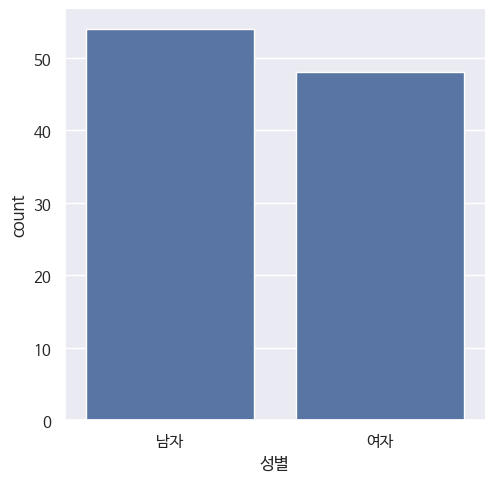

In [16]:
# 범주형 변수(막대그래프)
sns.catplot(x = "성별",
            kind = "count",
            data = eda_df)
plt.show()

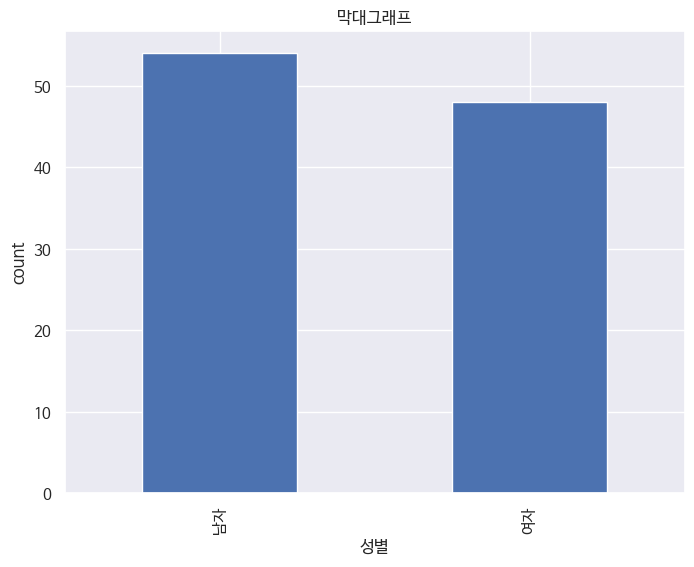

In [17]:
#pd_plot 이용
ax = freq_table["count"].plot(figsize = (8, 6),
                              kind = "bar")
ax.set(title = '막대그래프',
       xlabel = '성별',
       ylabel = "count")
plt.show()

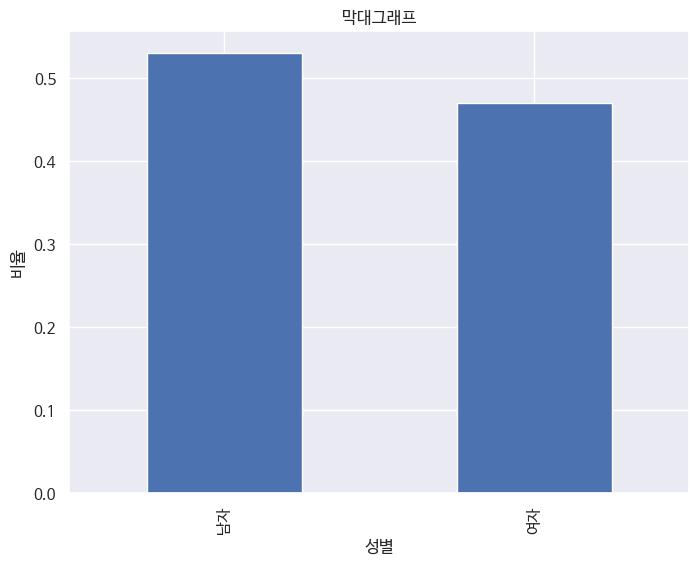

In [18]:
#pd_plot 이용(비율)
ax = freq_table["prop"].plot(figsize = (8, 6),
                              kind = "bar")
ax.set(title = '막대그래프',
       xlabel = '성별',
       ylabel = "비율")
plt.show()

## 4.범주형 변수(2개)

### 4.1 분할표(Cross-tablation)

In [19]:
cross_table = pd.crosstab(index = eda_df["성별"],
                         columns = eda_df["분반"])
cross_table

분반,A반,B반
성별,,
남자,21,33
여자,31,17


In [20]:
# margins
cross_table = pd.crosstab(index = eda_df["성별"],
                          columns = eda_df["분반"],
                          margins = True)
# cross_table.index = ["남자","여자"]
cross_table

분반,A반,B반,All
성별,,,
남자,21,33,54
여자,31,17,48
All,52,50,102


In [21]:
# 정리
cross_table.index = ["남자","여자", "열전체"]
cross_table.columns = ["A반","B반","행전체"]

cross_table

,A반,B반,행전체
남자,21,33,54
여자,31,17,48
열전체,52,50,102


In [22]:
# 전체비율
cross_table/cross_table.loc["열전체","행전체"]

,A반,B반,행전체
남자,0.205882,0.323529,0.529412
여자,0.303922,0.166667,0.470588
열전체,0.509804,0.490196,1.000000


In [23]:
# 열비율
cross_table/cross_table.loc["열전체"]

,A반,B반,행전체
남자,0.403846,0.66,0.529412
여자,0.596154,0.34,0.470588
열전체,1.000000,1.00,1.000000


In [24]:
# 행비율
cross_table.div(cross_table["행전체"], axis=0)

,A반,B반,행전체
남자,0.388889,0.611111,1.0
여자,0.645833,0.354167,1.0
열전체,0.509804,0.490196,1.0


In [25]:
# 전체비율 저장
cross_table_prop = cross_table/cross_table.loc["열전체","행전체"]

### 4.2 그래프 그리기(막대 그래프)

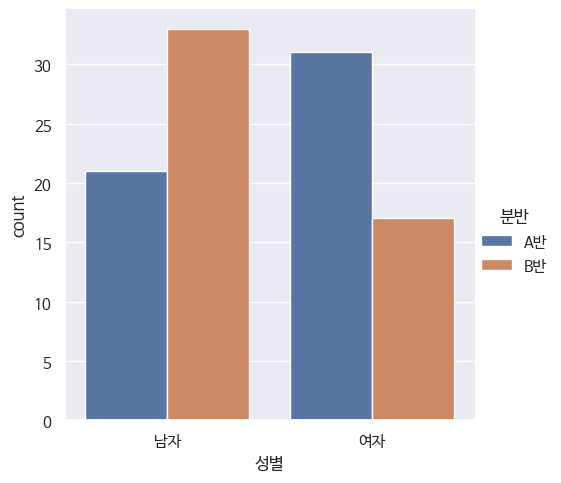

In [26]:
# 누적 막대그래프(count)
sns.catplot(x = "성별",
            hue = "분반",
            kind = "count",
            data = eda_df)
plt.show()